<a href="https://colab.research.google.com/github/PraeJi/DICOM-to-Image/blob/main/1_DICOM_to_JPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE** : Convert DICOM to .jpg using pydicom library (sorted image by InstanceNumber)

In [ ]:
!pip install idc-index --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.1 MB/s eta 0:00:00


In [ ]:
!idc download 1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806

2024-09-18 03:33:38,677 - Downloading from IDC v19 index
2024-09-18 03:33:39,280 - Identified matching SeriesInstanceUID: ['1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806']
2024-09-18 03:33:39,337 - Total size of files to download: 91.85 MB
2024-09-18 03:33:39,345 - Total free space on disk: 80.234053632GB
2024-09-18 03:33:39,884 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-18 03:33:39,896 - Initial size of the directory: 0 bytes
2024-09-18 03:33:39,896 - Approximate size of the files that need to be downloaded: 91850000.0 bytes
2024-09-18 03:33:43,964 - Successfully downloaded files to /content


In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.5 MB/s eta 0:00:00


# Convert DICOM to .jpg (sort follow instance number)

บันทึกภาพทั้งหมด 174 ภาพ ลงในโฟลเดอร์ 'JPG_test_sorted1' สำเร็จแล้ว.


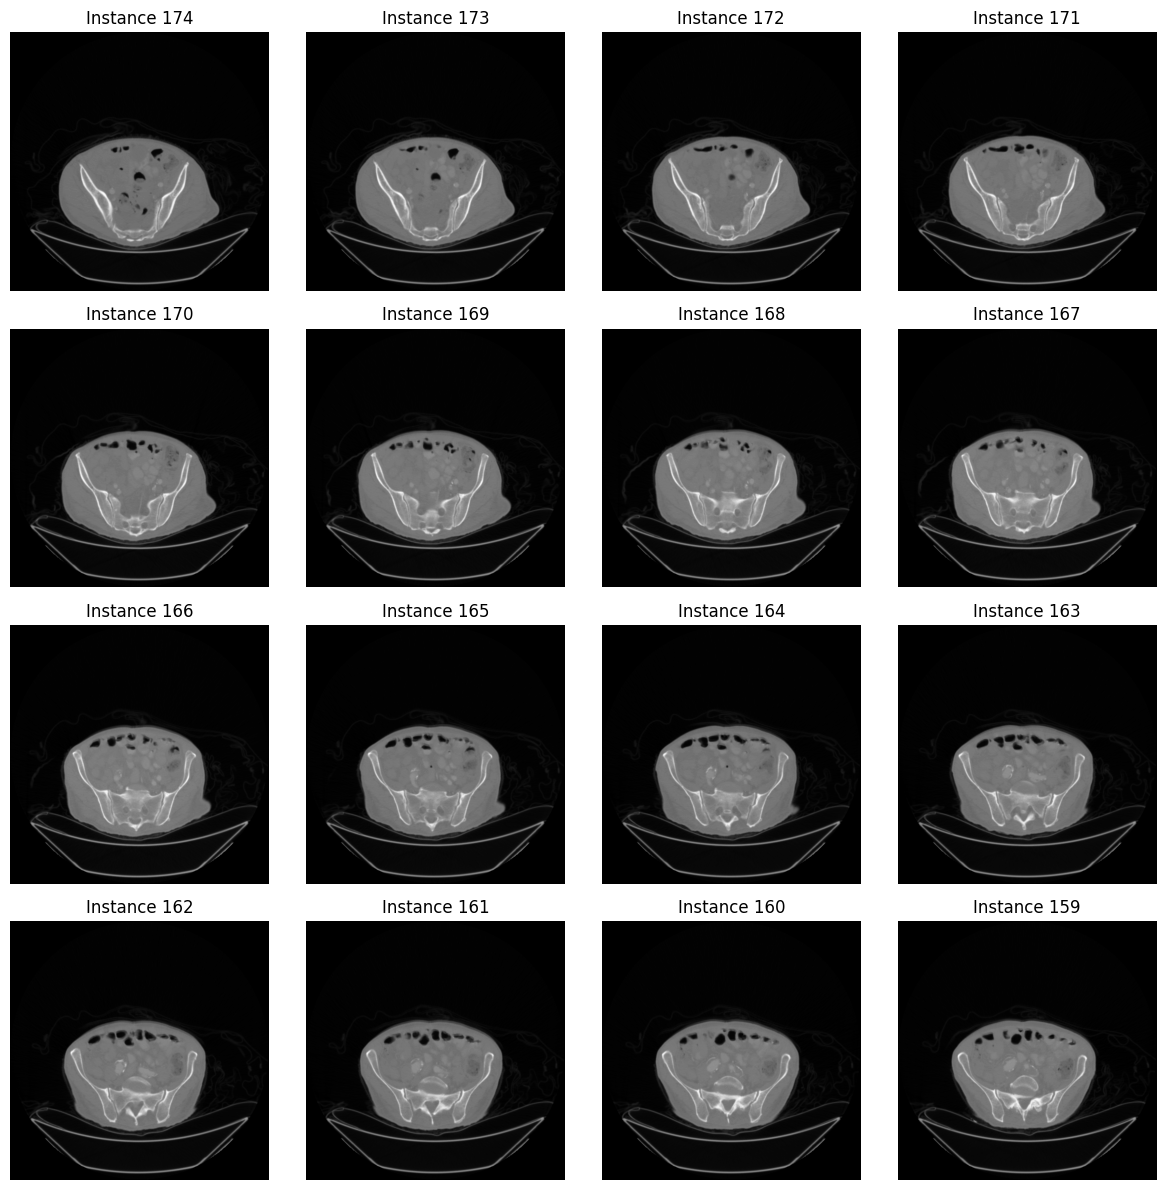

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# โฟลเดอร์ที่เก็บไฟล์ .dcm
folder_path = "/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/"

# โฟลเดอร์สำหรับบันทึกภาพ JPG
jpg_folder_path = "JPG_test_sorted1"

# ตรวจสอบและสร้างโฟลเดอร์สำหรับบันทึกภาพหากยังไม่มี
if not os.path.exists(jpg_folder_path):
    os.makedirs(jpg_folder_path)

# สร้าง list เก็บข้อมูลของไฟล์ DICOM และ InstanceNumber
dicom_files = []

# ดึงรายชื่อไฟล์ทั้งหมดในโฟลเดอร์
for file in os.listdir(folder_path):
    if file.endswith(".dcm"):
        # อ่านไฟล์ DICOM
        dicom_path = os.path.join(folder_path, file)
        ds = pydicom.dcmread(dicom_path)

        # ตรวจสอบว่าไฟล์มี InstanceNumber หรือไม่
        if hasattr(ds, 'InstanceNumber'):
            # เก็บ InstanceNumber และเส้นทางของไฟล์
            dicom_files.append((ds.InstanceNumber, dicom_path))

# จัดเรียงไฟล์ตาม InstanceNumber จากมากไปน้อย
dicom_files.sort(key=lambda x: x[0], reverse=True) #x[0] หมายถึง InstanceNumber ซึ่งเป็นข้อมูลแรกในแต่ละทูเพิลของ dicom_files

# บันทึกทุกภาพที่ถูกจัดเรียงแล้วเป็นไฟล์ JPG
for instance_number, dicom_path in dicom_files:
    # อ่านข้อมูลของไฟล์ DICOM ที่จัดเรียงแล้ว
    ds = pydicom.dcmread(dicom_path)

    # กำหนดชื่อไฟล์สำหรับบันทึกเป็น JPG
    output_filename = os.path.join(jpg_folder_path, f'Instance_{instance_number}.jpg')

    # บันทึกภาพเป็น JPG
    plt.imsave(output_filename, ds.pixel_array, cmap='gray') #ds.pixel_array ข้อมูลภาพใน dicom

print(f"บันทึกภาพทั้งหมด {len(dicom_files)} ภาพ ลงในโฟลเดอร์ '{jpg_folder_path}' สำเร็จแล้ว.")

#ดูตัวอย่าง
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < len(dicom_files):
        # อ่านข้อมูลของไฟล์ DICOM ที่จัดเรียงแล้ว
        instance_number, dicom_path = dicom_files[i]
        ds = pydicom.dcmread(dicom_path)

        # แสดงภาพจาก pixel_array
        ax.imshow(ds.pixel_array,cmap='gray')
        ax.set_title(f'Instance {instance_number}')
        ax.axis('off')  # ซ่อนแกนของ subplot
    else:
        ax.axis('off')  # ซ่อน subplot ที่ว่างเปล่า

# ปรับช่องว่างระหว่าง subplot
plt.tight_layout()
plt.show()


## ปรับแสง

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# โฟลเดอร์ที่เก็บไฟล์ .dcm
folder_path = "/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/"

jpg_folder_path = "JPG_test_sorted7"

# ตรวจสอบและสร้างโฟลเดอร์สำหรับบันทึกภาพหากยังไม่มี
if not os.path.exists(jpg_folder_path):
    os.makedirs(jpg_folder_path)

# สร้าง list เก็บข้อมูลของไฟล์ DICOM และ InstanceNumber
dicom_files = []

# ดึงรายชื่อไฟล์ทั้งหมดในโฟลเดอร์
for file in os.listdir(folder_path):
    if file.endswith(".dcm"):
        dicom_path = os.path.join(folder_path, file)
        ds = pydicom.dcmread(dicom_path)

        if hasattr(ds, 'InstanceNumber'):
            dicom_files.append((ds.InstanceNumber, dicom_path))

# จัดเรียงไฟล์ตาม InstanceNumber จากมากไปน้อย
dicom_files.sort(key=lambda x: x[0], reverse=True)

# ค่าของ Window Width (W) และ Window Level (L)
W = 430
L = -30

# Loop เพื่อบันทึกทุกภาพที่ถูกจัดเรียงแล้วเป็นไฟล์ JPG พร้อมปรับแสงตาม W และ L
for instance_number, dicom_path in dicom_files:
    ds = pydicom.dcmread(dicom_path)

    # ดึงข้อมูล pixel_array และปรับแสงตามสูตร Windowing
    pixel_array = ds.pixel_array.astype(np.float64)  # เปลี่ยนให้เป็น float64 เพื่อการคำนวณที่แม่นยำ

    # ใช้ Window Width (W) และ Window Level (L) เพื่อปรับพิกเซล
    adjusted_pixel_array = ((pixel_array - (L - W / 2)) / W) * 255.0

    # จำกัดค่า pixel ให้อยู่ในช่วง 0 ถึง 255
    adjusted_pixel_array = np.clip(adjusted_pixel_array, 0, 255)

    # แปลงเป็น uint8 สำหรับการบันทึก
    adjusted_pixel_array = adjusted_pixel_array.astype(np.uint8)

    # บันทึกภาพเป็น JPG
    output_filename = os.path.join(jpg_folder_path, f'Instance_{instance_number}.jpg')
    plt.imsave(output_filename, adjusted_pixel_array, cmap='gray')

print(f"บันทึกภาพทั้งหมด {len(dicom_files)} ภาพ ลงในโฟลเดอร์ '{jpg_folder_path}' พร้อมปรับแสงสำเร็จแล้ว.")


บันทึกภาพทั้งหมด 174 ภาพ ลงในโฟลเดอร์ 'JPG_test_sorted7' พร้อมปรับแสงสำเร็จแล้ว.


# Learning Metadata in DICOM

In [ ]:
import pydicom

# อ่านข้อมูลจากไฟล์ DICOM
info = pydicom.dcmread("/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/065f3f9a-d145-4d22-8603-c09d7819ebef.dcm")

# แสดงข้อมูล DICOM
print(info)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.9999.103.6457218251424591807386788711018
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008,0012) Instance Creation Date              DA: '20120214'
(0008,0013) Instance Creation Time              TM: '190037'
(0008,0016) SOP Class UID              

In [ ]:
info.PatientSex

'M'

In [ ]:
info.PatientAge

'067Y'

In [ ]:
info.PatientAge[1:3]

'67'

In [ ]:
info.InstanceNumber

'51'

In [ ]:
info.Modality

'CT'

In [ ]:
info.BodyPartExamined

'CHESTABDOMEN'

In [ ]:
info.SeriesDescription

'3MM'

In [ ]:
info.ImagePositionPatient

[-250, -126, -142]

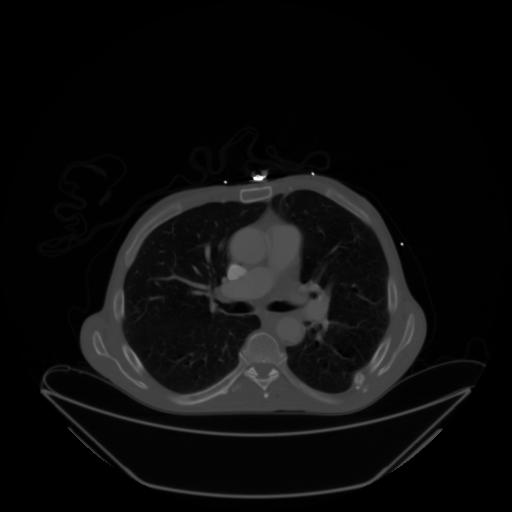

In [ ]:
from PIL import Image
Image.open("/content/JPG_test_sorted/Instance_51.jpg")

# Extract

In [ ]:
!git clone https://github.com/vivek8981/DICOM-to-JPG.git

Cloning into 'DICOM-to-JPG'...
remote: Enumerating objects: 14, done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 14 (from 1)
Receiving objects: 100% (14/14), 4.25 KiB | 4.25 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import pydicom as dicom
import os
import PIL # optional
import pandas as pd
import csv
# list of attributes available in dicom image
# download this file from the given github link
dicom_image_description = pd.read_csv("/content/DICOM-to-JPG/dicom_image_description.csv")
# Specify the .dcm folder path
folder_path = "/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/"
images_path = os.listdir(folder_path)
# Patient's information will be stored in working directory #'Patient_Detail.csv'
with open('Patient_Detail.csv', 'w', newline ='') as csvfile:
    fieldnames = list(dicom_image_description["Description"])
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(fieldnames)
    for n, image in enumerate(images_path):
        ds = dicom.dcmread(os.path.join(folder_path, image))
        rows = []
        for field in fieldnames:
            if ds.get(field) is None:
                rows.append('')
            else:
                x = str(ds.data_element(field)).replace("'", "")
                y = x.find(":")
                x = x[y+2:]
                rows.append(x)
        writer.writerow(rows)

In [ ]:
import pydicom as dicom
import os
import pandas as pd
import csv

# อ่านไฟล์รายละเอียด DICOM จาก CSV
dicom_image_description = pd.read_csv("/content/DICOM-to-JPG/dicom_image_description.csv")

# กำหนดเส้นทางของโฟลเดอร์ที่มีไฟล์ DICOM
folder_path = "/content/covid_19_ar/COVID-19-AR-16406488/1.3.6.1.4.1.14519.5.2.1.9999.103.2986119521997326136902364363916/CT_1.3.6.1.4.1.14519.5.2.1.9999.103.2179137684384294959699673428806/"
images_path = os.listdir(folder_path)

# สร้างรายการไฟล์ DICOM พร้อมด้วย InstanceNumber
dicom_files = []

for image in images_path:
    ds = dicom.dcmread(os.path.join(folder_path, image))

    # ตรวจสอบว่าไฟล์มี InstanceNumber หรือไม่
    if hasattr(ds, 'InstanceNumber'):
        # เก็บ InstanceNumber และเส้นทางของไฟล์
        dicom_files.append((ds.InstanceNumber, os.path.join(folder_path, image)))

# จัดเรียงไฟล์ตาม InstanceNumber
dicom_files.sort(key=lambda x: x[0])

# เขียนข้อมูลของผู้ป่วยลงในไฟล์ CSV
with open('Patient_Detail1.csv', 'w', newline='') as csvfile:
    # ใช้ฟิลด์เนมจาก dicom_image_description.csv
    fieldnames = list(dicom_image_description["Description"])
    writer = csv.writer(csvfile, delimiter=',')

    # เขียนหัวข้อ (fieldnames) ลงใน CSV
    writer.writerow(fieldnames)

    # Loop ผ่านไฟล์ DICOM ที่จัดเรียงแล้วตาม InstanceNumber
    for instance_number, dicom_path in dicom_files:
        ds = dicom.dcmread(dicom_path)
        rows = []
        for field in fieldnames:
            # ตรวจสอบว่ามีข้อมูลหรือไม่
            if ds.get(field) is None:
                rows.append('')
            else:
                # ดึงข้อมูลและทำการจัดรูปแบบ
                x = str(ds.data_element(field)).replace("'", "")
                y = x.find(":")
                x = x[y+2:]
                rows.append(x)
        # เขียนข้อมูลลงในไฟล์ CSV
        writer.writerow(rows)

print(f"ข้อมูลถูกจัดเรียงและบันทึกในไฟล์ 'Patient_Detail1.csv' สำเร็จแล้ว.")


ข้อมูลถูกจัดเรียงและบันทึกในไฟล์ 'Patient_Detail.csv' สำเร็จแล้ว.
